In [2]:
from Run import Run
import numpy as np
import matplotlib.pyplot as plt

In [118]:
folder = "C:/Users/Karlen/Documents/temp/"

run_baseline = Run.open_file(folder+"run_000676.dk")
baseline_means = run_baseline.user['baseline_means']
baseline_stds = run_baseline.user['baseline_stds']

In [119]:
# special runs:
#  - random during spill (no electron veto)
# 592 - random during beam off
# others:

run_number = 635

run = Run.open_file(folder+"run_000"+str(run_number)+".dk")
config = run.config

if 'signal_times' in run.user:
    signal_times = run.user['signal_times']
else:
    signal_times = None

hodo_ch = {}
for hodo in range(15):
    if hodo < 8:
        hodo_ch[hodo] = 24 + hodo
    else:
        hodo_ch[hodo] = 9 + hodo

voltage_scale = config["VoltageScale"]

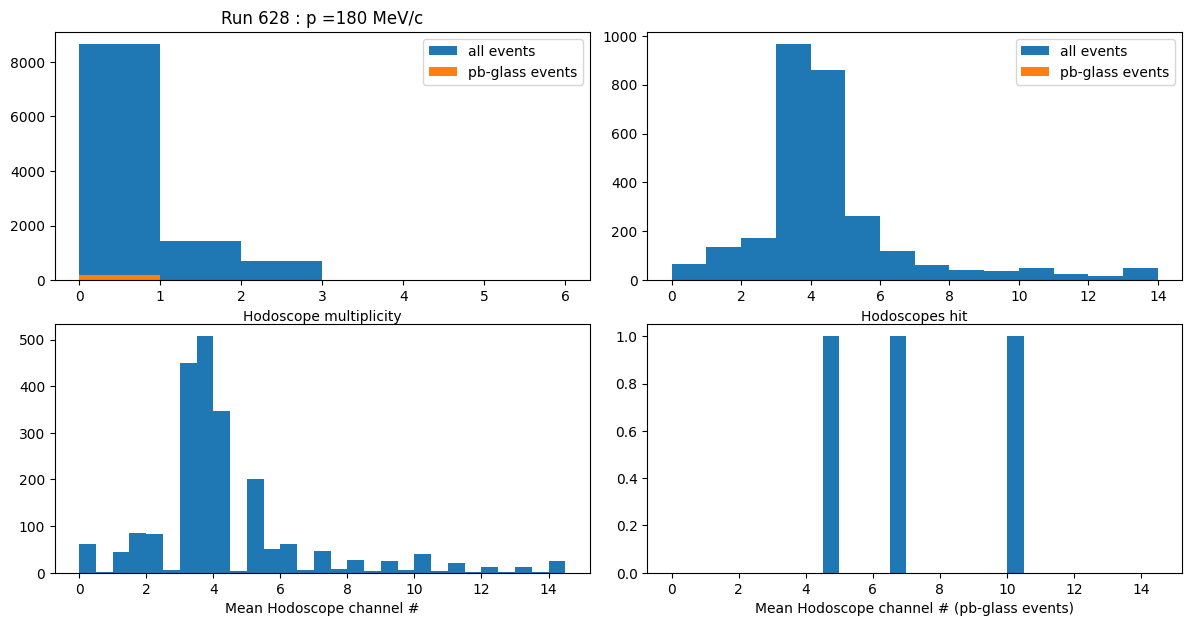

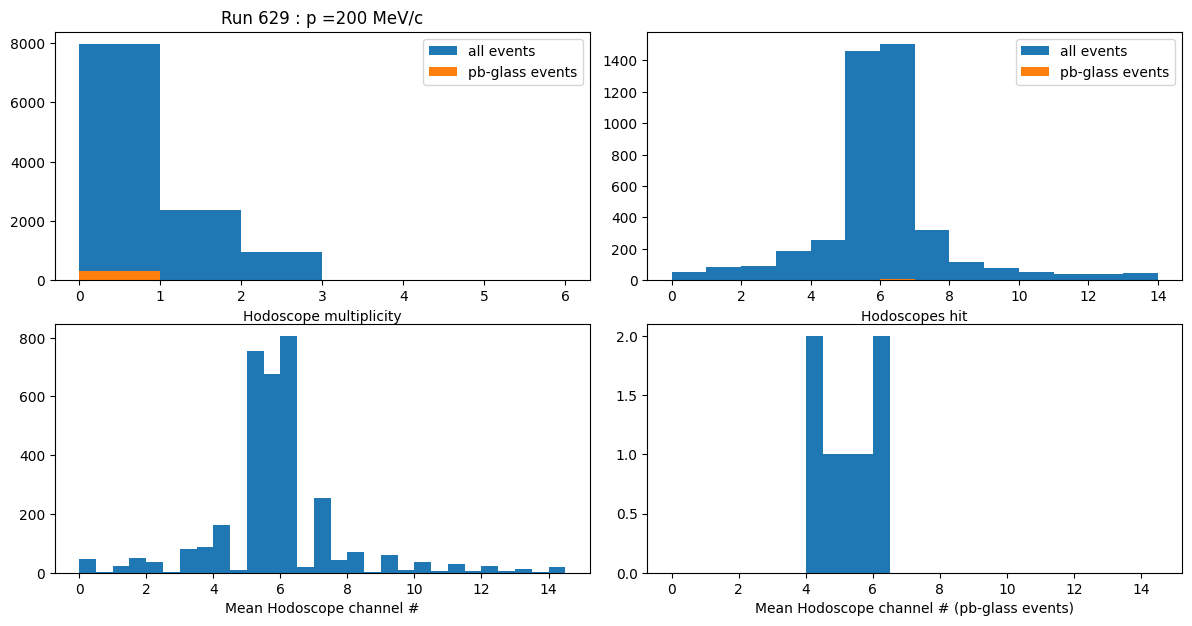

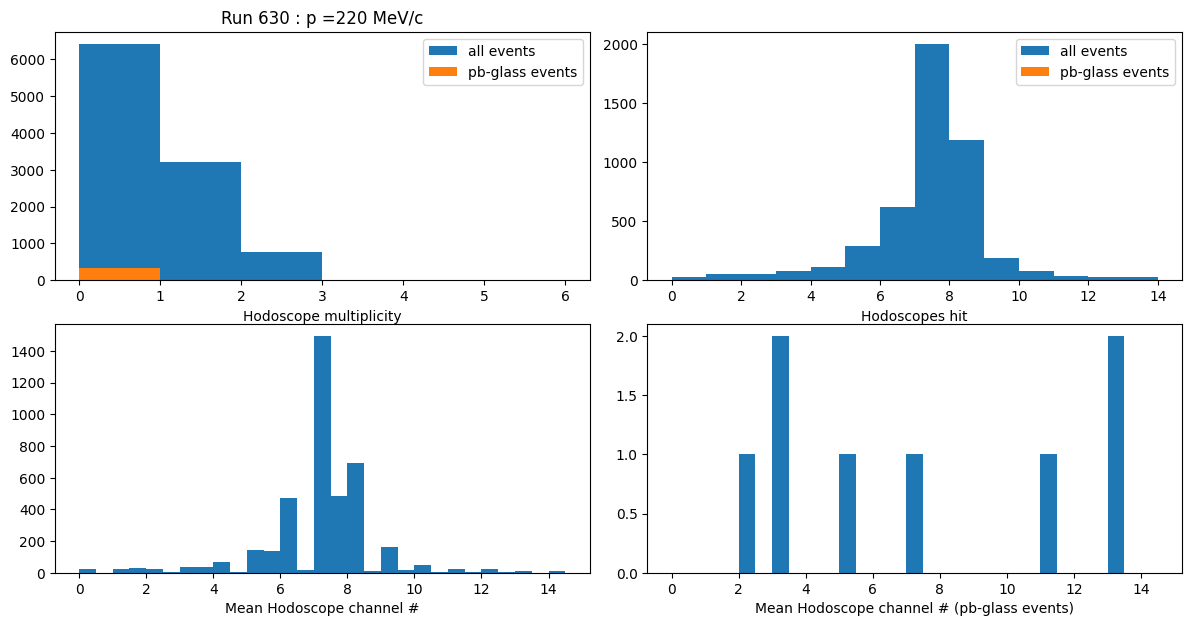

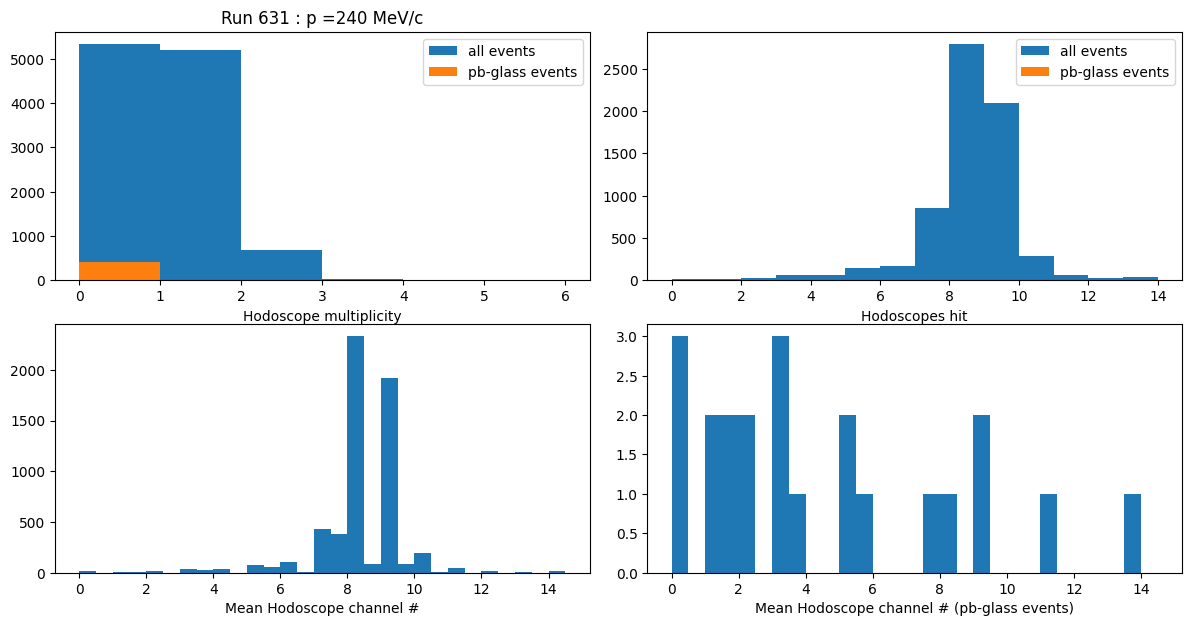

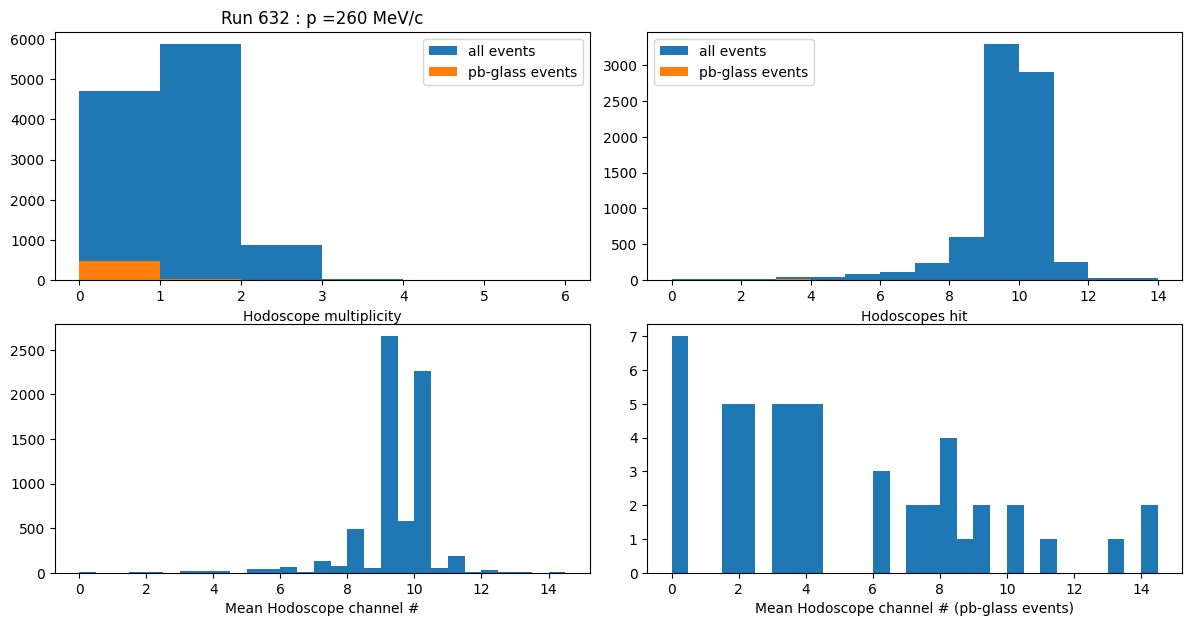

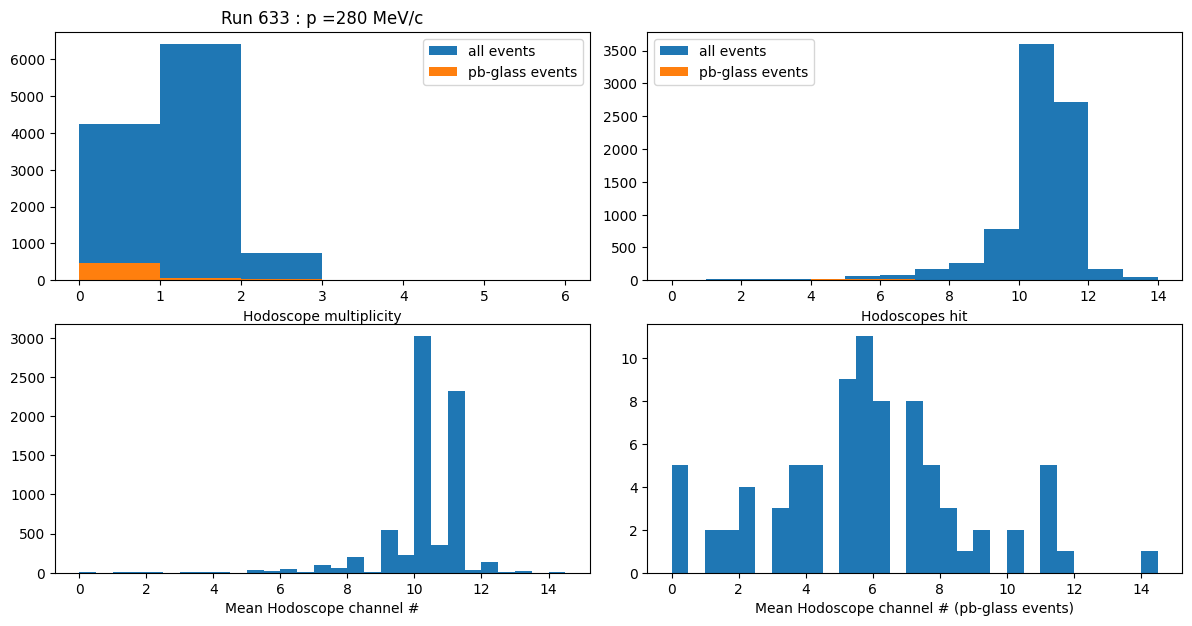

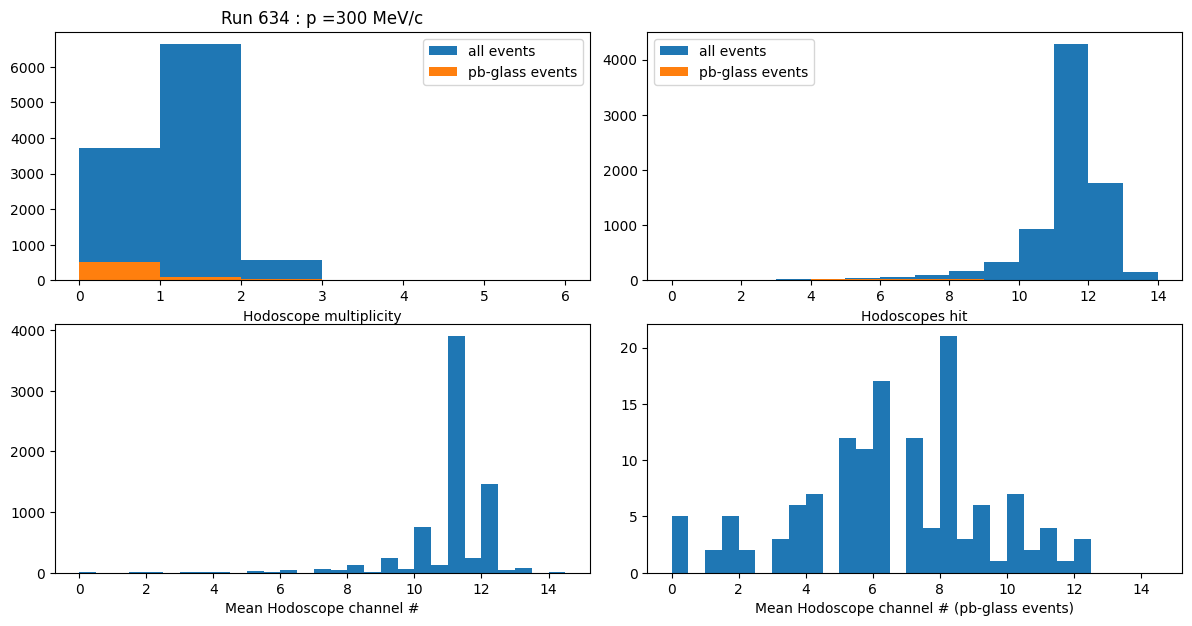

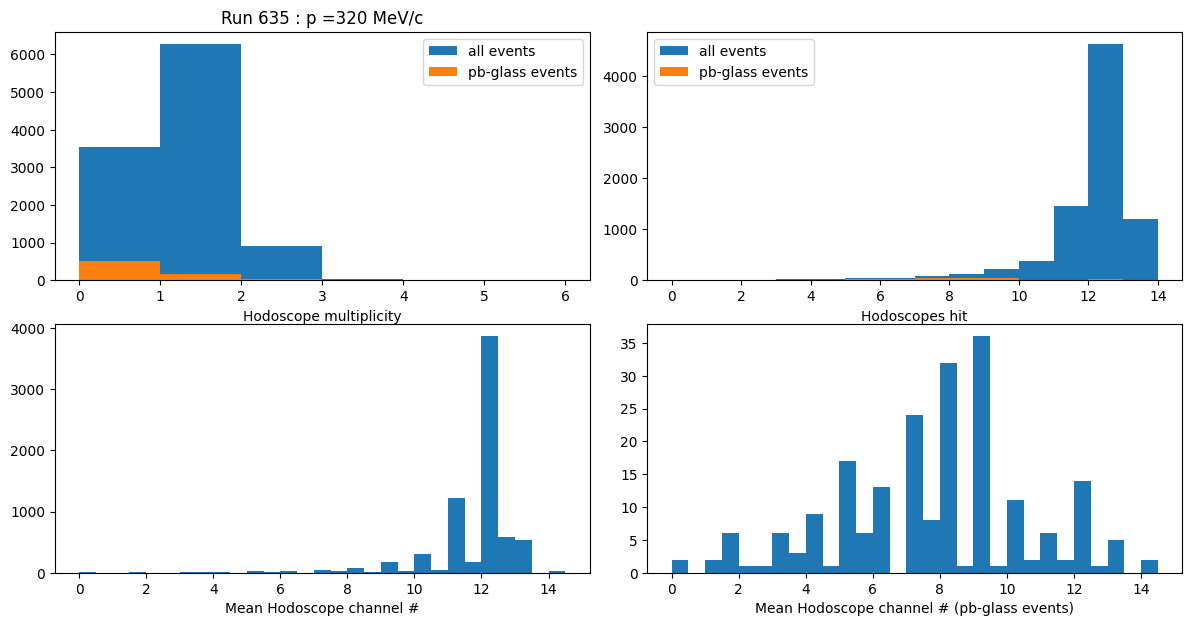

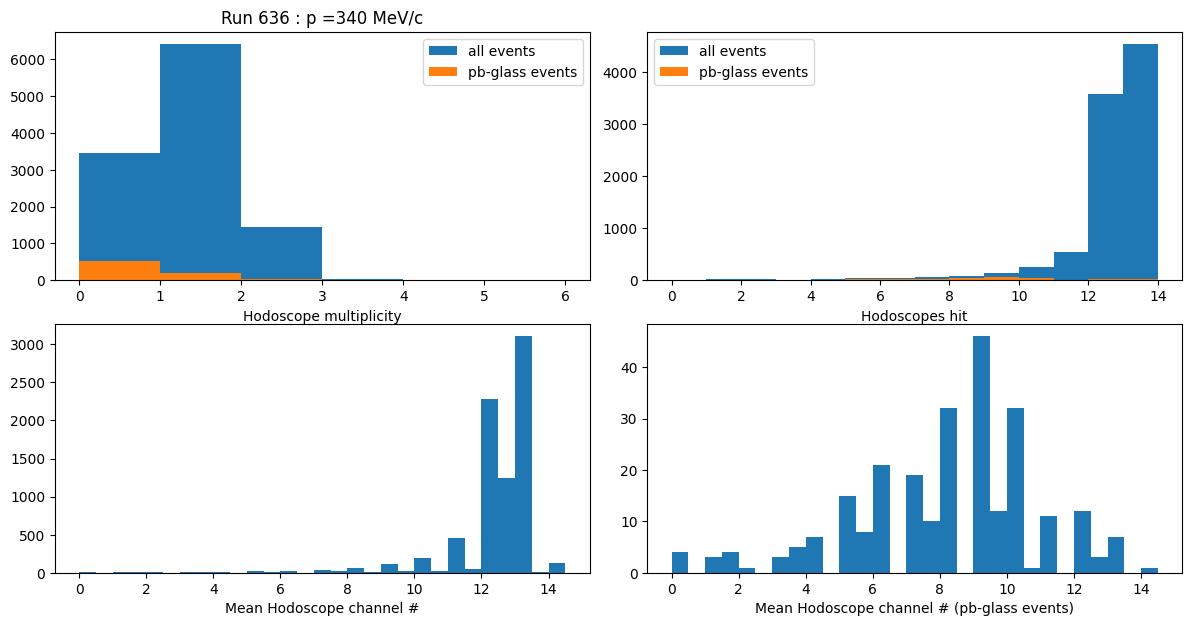

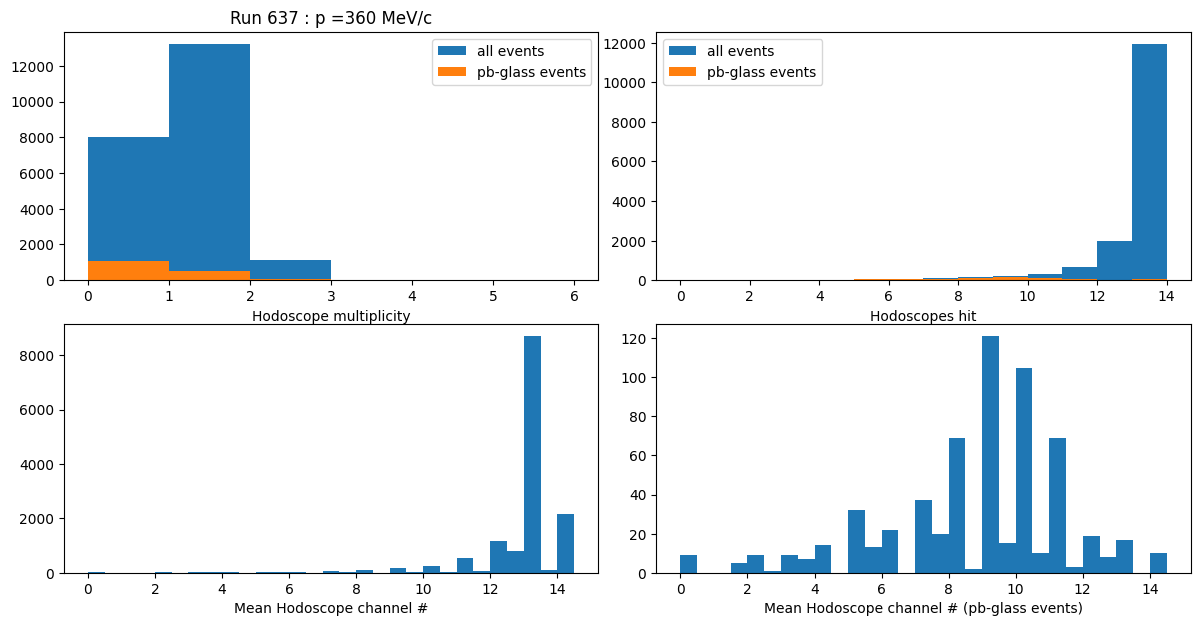

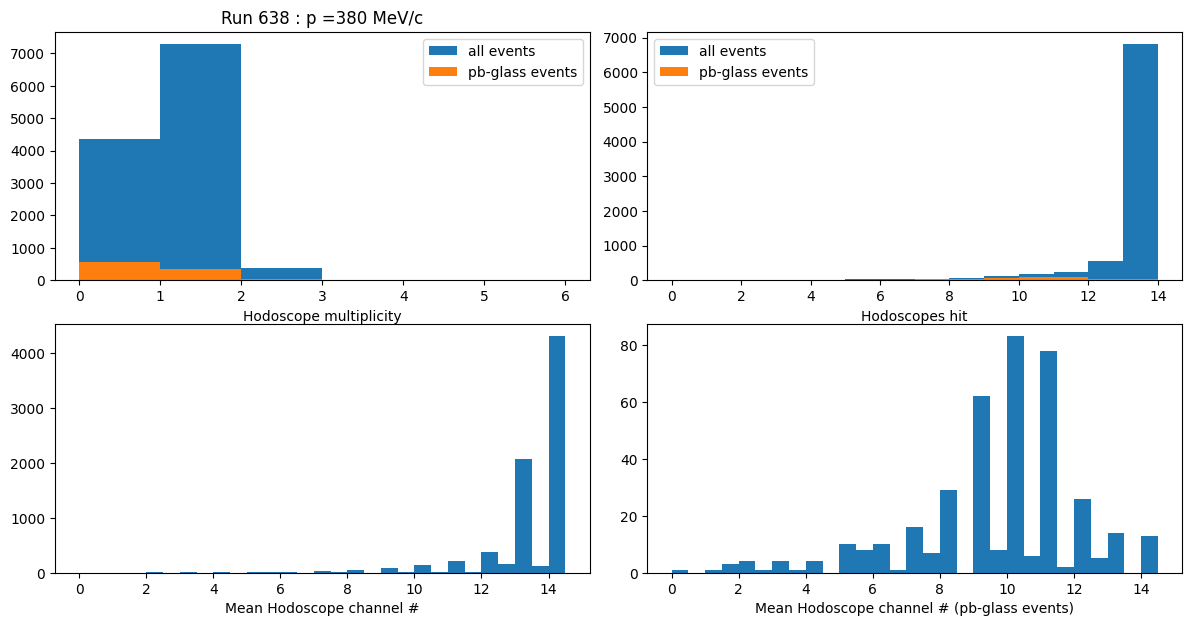

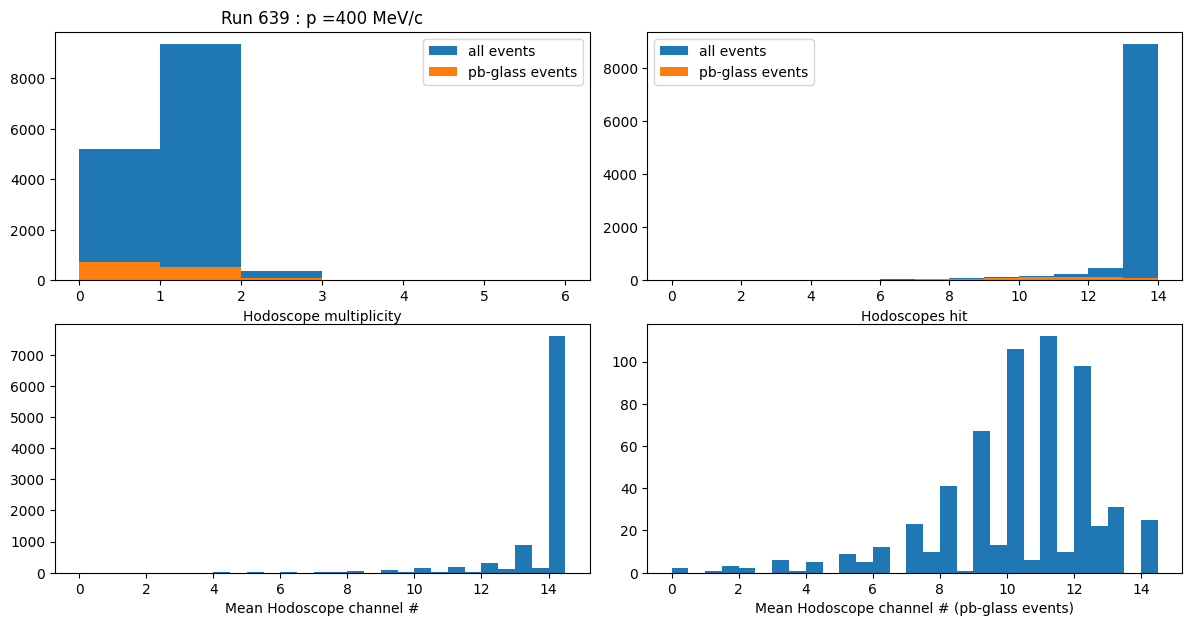

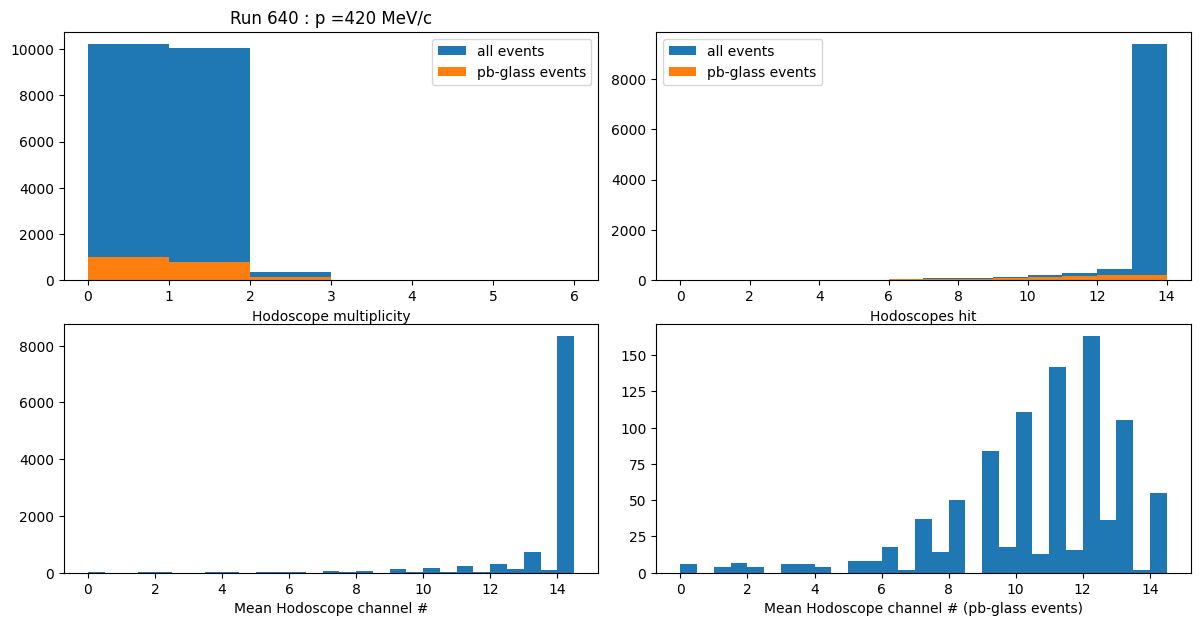

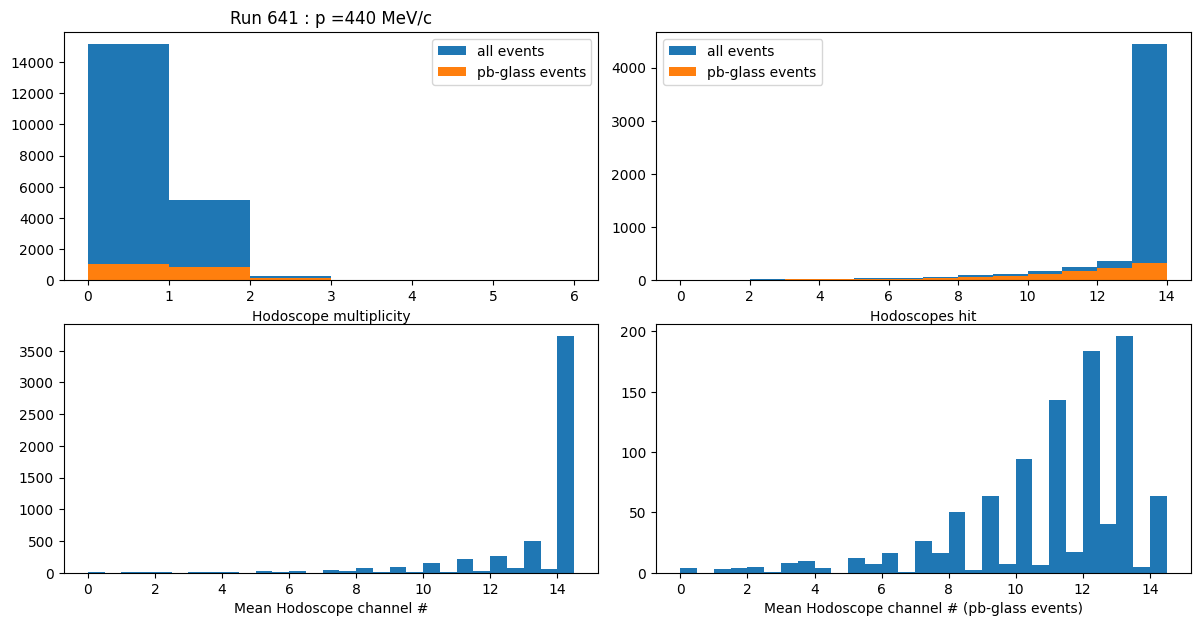

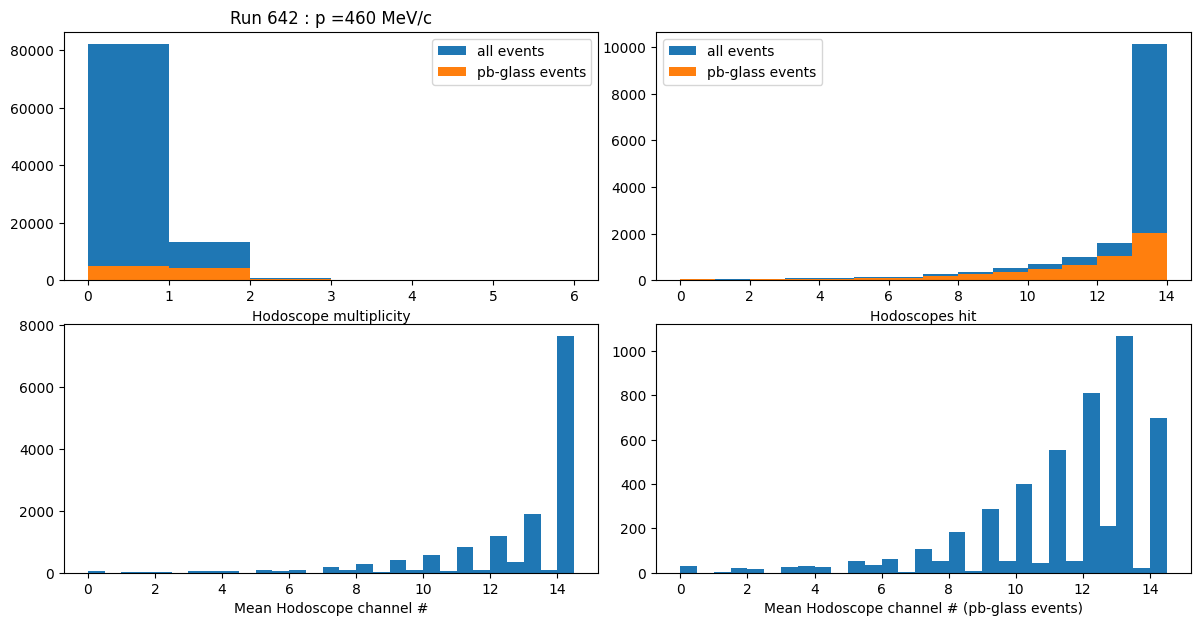

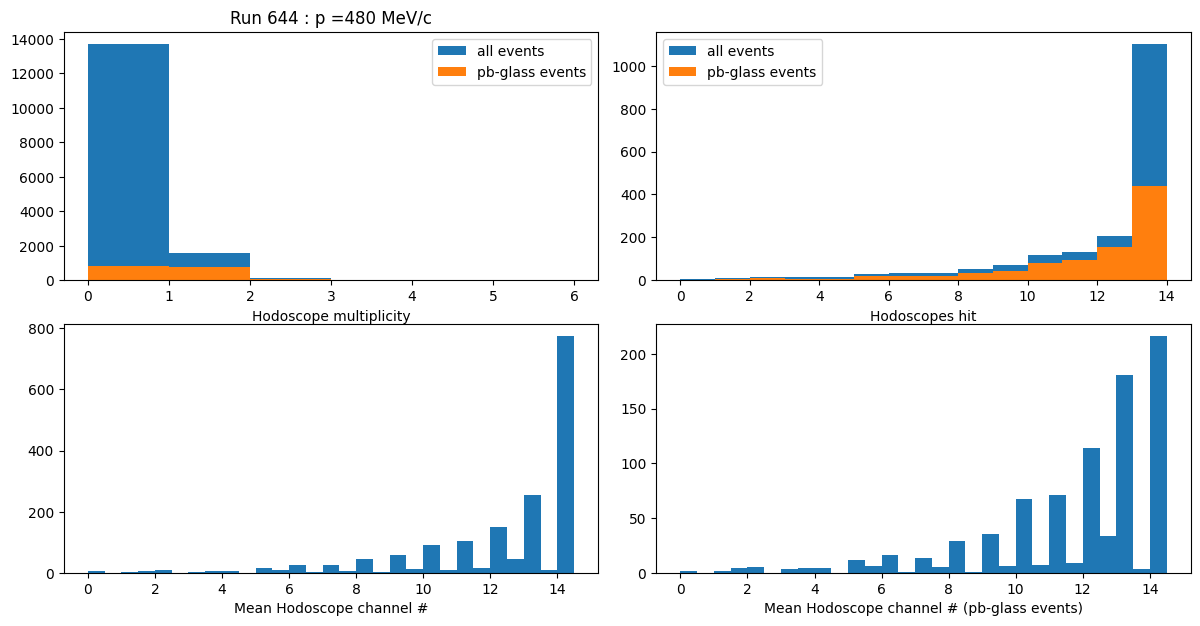

In [117]:
# compare hodo distributions (also those with pb)
# because early runs did not have digitizers start early enough - cannot use peak finder results
# just do a simple threshold cut

pb_chan = 16
pb_delay = 35
pb_window = 30

run_mom = {
    582:0.4,
    583:0.3,
    584:+0.34,
    585:+0.36,
    586:+0.38,
    588:+0.42,
    591:+0.5,
}

run_mom = {
    628:180,
    629:200,
    630:220,
    631:240,
    632:260,
    633:280,
    634:300,
    635:320,
    636:340,
    637:360,
    638:380,
    639:400,
    640:420,
    641:440,
    642:460,
    644:480,
}

runs = [583, 584, 585, 586, 582, 588, 591]
runs = [628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,644]

#runs = [635]

for run_number in runs:
    run = Run.open_file(folder+"run_000"+str(run_number)+".dk")

    if 'signal_times' in run.user:
        signal_times = run.user['signal_times']
    else:
        signal_times = None

    hodo_count = []
    hodo_count_pb = []

    hodo_mult = []
    hodo_mult_pb = []

    hodo_means = []
    hodo_means_pb = []

    for ie in range(len(run.analyses[pb_chan].raw_waveforms)):

        hodo_signals = []
        for hodo in range(15):
            if 5 < np.min(run.analyses[hodo_ch[hodo]].raw_waveforms[ie]) < 14000:
                hodo_signals.append(hodo)

        pb_waveform = run.analyses[pb_chan].raw_waveforms[ie]
        pb_sum = 0
        for it in range(pb_delay, pb_delay+pb_window):
            pb_sum += pb_waveform[it] - baseline_means[pb_chan]

        pb_hit = -pb_sum*voltage_scale > 5.

        count = 0
        count_pb = 0
        for hodo in range(15):
            if hodo in hodo_signals:
                count += 1
                if pb_hit:
                    count_pb += 1

        hodo_mult.append(count)
        if pb_hit:
            hodo_mult_pb.append(count_pb)

        for hodo in range(15):
            if hodo in hodo_signals:
                hodo_count.append(hodo)
                if pb_hit:
                    hodo_count_pb.append(hodo)

        sum = 0.
        sum_pb = 0.
        n = 0
        n_pb = 0
        for hodo in range(15):
            if hodo in hodo_signals:
                sum += hodo
                n += 1
                if pb_hit:
                    sum_pb += hodo
                    n_pb += 1

        if n>0:
            mean = 1.*sum/n
            hodo_means.append(mean)
            if n_pb > 0:
                mean_pb = 1.*sum_pb/n
                hodo_means_pb.append(mean_pb)

    fig, axes = plt.subplots(2, 2, figsize=(12,6))
    fig.tight_layout()

    axes[0][0].hist(hodo_mult,bins=range(0,7,1),label='all events')
    axes[0][0].hist(hodo_mult_pb,bins=range(0,7,1),label='pb-glass events')
    axes[0][0].set_xlabel('Hodoscope multiplicity')
    axes[0][0].legend()
    axes[0][0].set_title('Run '+str(run_number)+' : p ='+str(run_mom[run_number])+' MeV/c')
    axes[0][1].hist(hodo_count,bins=range(0,15),label='all events')
    axes[0][1].hist(hodo_count_pb,bins=range(0,15),label='pb-glass events')
    axes[0][1].set_xlabel('Hodoscopes hit')
    axes[0][1].legend()
    axes[1][0].hist(hodo_means,bins=np.arange(0.,15.,0.5))
    axes[1][0].set_xlabel('Mean Hodoscope channel #')
    axes[1][1].hist(hodo_means_pb,bins=np.arange(0.,15.,0.5))
    axes[1][1].set_xlabel('Mean Hodoscope channel # (pb-glass events)')

    plt.savefig(folder+'hodo_'+str(run_number)+'.png')
    plt.show()

In [48]:
hodo_count

[0, 0, 0, 0, 0, 0, 0, 0, 89, 952, 1078, 0, 268, 13, 7]

In [49]:
hodo_mult

[3736, 605, 883, 12, 0, 0, 0]

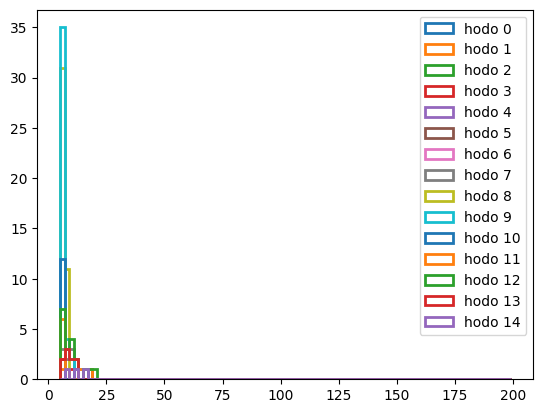

In [114]:
pb_chan = 16
pb_delay = 35
pb_window = 30

pb_sums = []
pb_sums_hodo = {}
for ie in range(len(signal_times[0])):
    pb_waveform = run.analyses[pb_chan].raw_waveforms[ie]
    pb_sum = 0
    for it in range(pb_delay, pb_delay+pb_window):
        pb_sum += pb_waveform[it] - baseline_means[pb_chan]
    pb_sums.append(-pb_sum*voltage_scale)
    for hodo in range(15):
        if len(signal_times[hodo_ch[hodo]][ie]) > 0:
            if hodo not in pb_sums_hodo:
                pb_sums_hodo[hodo] = []
            pb_sums_hodo[hodo].append(-pb_sum*voltage_scale)

#plt.hist(pb_sums)
#plt.hist(pb_sums, bins=np.arange(0.,200.,2.))

for hodo in range(15):
    if hodo in pb_sums_hodo:
        plt.hist(pb_sums_hodo[hodo], bins=np.arange(5.,200.,2.), histtype='step', linewidth=2,label='hodo '+str(hodo))

#plt.yscale('log')
plt.legend()
plt.show()

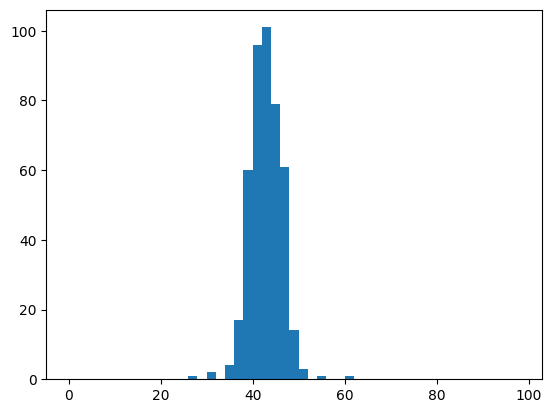

In [116]:
pb_chan = 16
pb_times = []
for ie in range(len(signal_times[0])):
    if len(signal_times[pb_chan][ie]) > 0:
        pb_times.append(signal_times[pb_chan][ie][0])

plt.hist(pb_times, bins=np.arange(0.,100.,2.))
plt.show()

In [83]:
len(run.analyses[31].raw_waveforms[0])

0

In [56]:
run_number

583

In [87]:
for hodo in range(8,15):
    print(hodo,hodo_ch[hodo],np.min(run.analyses[hodo_ch[hodo]].raw_waveforms[1]))

8 17 15602
9 18 8823
10 19 2418
11 20 15578
12 21 15503
13 22 15797
14 23 15741


In [90]:
run.analyses[1].raw_waveforms[1][0:10]

array([10832,  6489,  7008, 11888, 13764, 13913, 15062, 15687, 15962,
       15868], dtype=int16)

In [82]:
len(run.analyses[31].raw_waveforms[0])

0

In [76]:
hodo_ch[0]

24